# Introduction to Cartopy

# Notes
## This notebook will be on github.
## Let me know if there are other types of maps you are interested in.

Projection and Transform keyword arguments:
* The projection argument determines what the plot looks like. 
* The transform argument tells Cartopy what coordinate system your data are defined in.

It can be easy to get confused about what the projection and transform keyword arguments actually mean. 
Check out site below for example(s):
https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

# Documentation

In [1]:
from IPython.display import IFrame
documentation = IFrame(src='https://scitools.org.uk/cartopy/docs/latest/#', width=1000, height=500)
display(documentation)

# Imports

In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
from vega_datasets import data as vds

# Basic Map

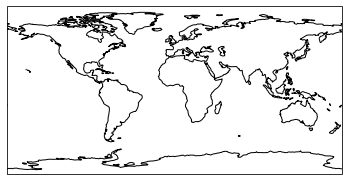

In [3]:
m1 = plt.axes(projection=ccrs.PlateCarree())
m1.coastlines()

In [4]:
conda install vega_datasets

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


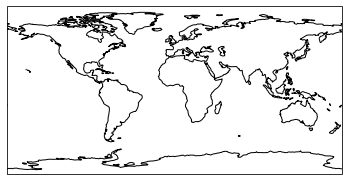

In [5]:
fig = plt.figure()
m2 = fig.add_subplot(projection=ccrs.PlateCarree())
m2.coastlines()

# Change Size

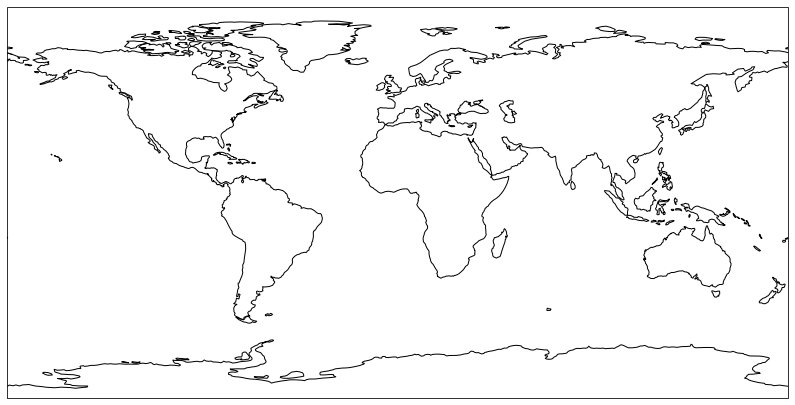

In [6]:
fig = plt.figure(figsize=(14,14))
m3 = fig.add_subplot(projection=ccrs.PlateCarree())
m3.coastlines()

# Add Features

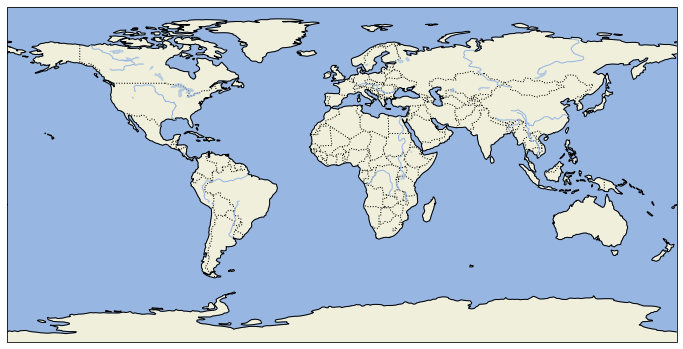

In [7]:
# import cartopy.feature as cfeature

plt.figure(figsize=(12,12))
m4 = plt.axes(projection=ccrs.PlateCarree())

m4.add_feature(cfeature.LAND)
m4.add_feature(cfeature.OCEAN)
m4.add_feature(cfeature.COASTLINE)
m4.add_feature(cfeature.BORDERS, linestyle=':')
m4.add_feature(cfeature.LAKES, alpha=0.5)
m4.add_feature(cfeature.RIVERS)

# m4.stock_img()

# Save Map

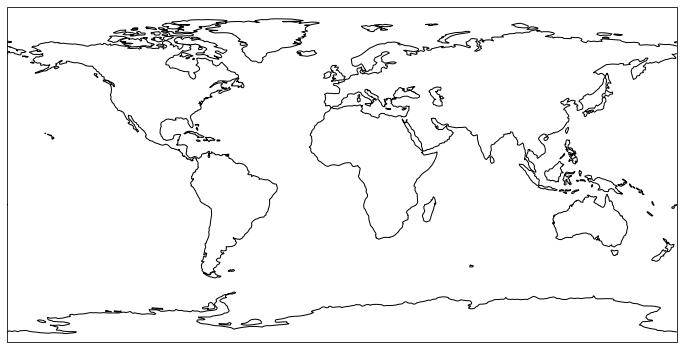

In [8]:
plt.figure(figsize=(12,12))
m5 = plt.axes(projection=ccrs.PlateCarree())
m5.coastlines()

# save plot by calling plt.savefig() before plt.show()
# plt.savefig('path/coastlines.pdf')
# plt.savefig('path/coastlines.png')

# Plot Locations with Labels

In [9]:
airports = vds.airports()
airports = airports.iloc[:10]
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


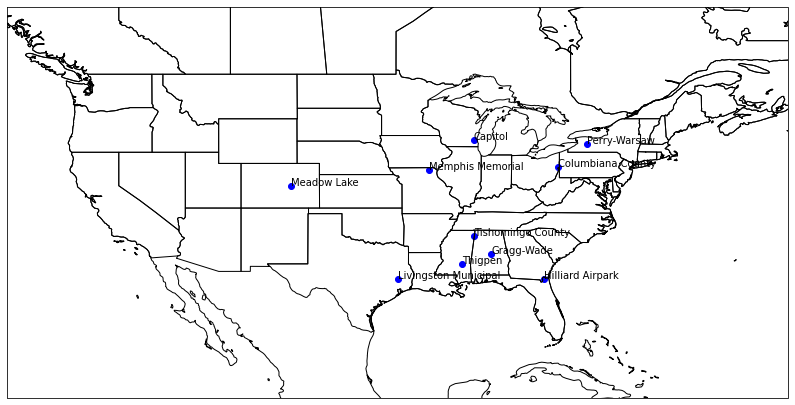

In [10]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m6.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m6.add_feature(cfeature.STATES)
m6.coastlines()

for i in airports.itertuples():
    m6.scatter(i.longitude, i.latitude, color='blue', transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, i.name)

# Plot Locations with Size Bubbles

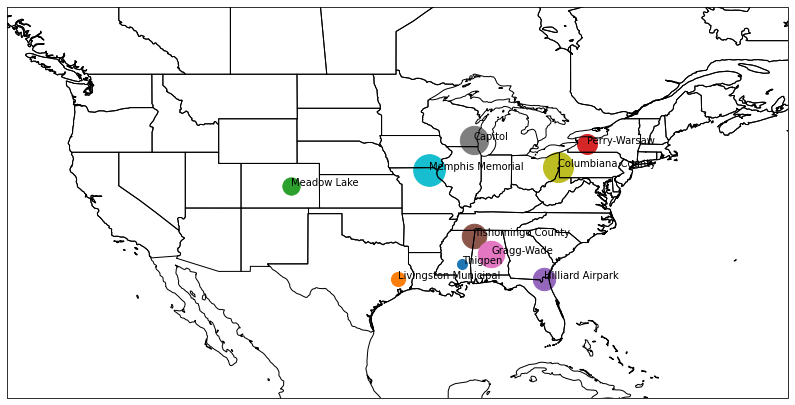

In [11]:
# add marker size column to airports dataframe
airports['marker_size'] = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

fig = plt.figure(figsize=(14, 14))
m7 = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m7.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m7.add_feature(cfeature.STATES)
m7.coastlines()

for i in airports.itertuples():
    m7.scatter(i.longitude, i.latitude, s=i.marker_size, transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, i.name)

# Projections with Subplots

/tmp/ipykernel_6710/2355130669.py:9: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(),
/tmp/ipykernel_6710/2355130669.py:11: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(),
/tmp/ipykernel_6710/2355130669.py:17: UserWarning: The default value for the *approx* keyword argument to OSNI will change from True to False after 0.18.
  'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(),
/home/jmedinah09/miniconda3/envs/unidata/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:152: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


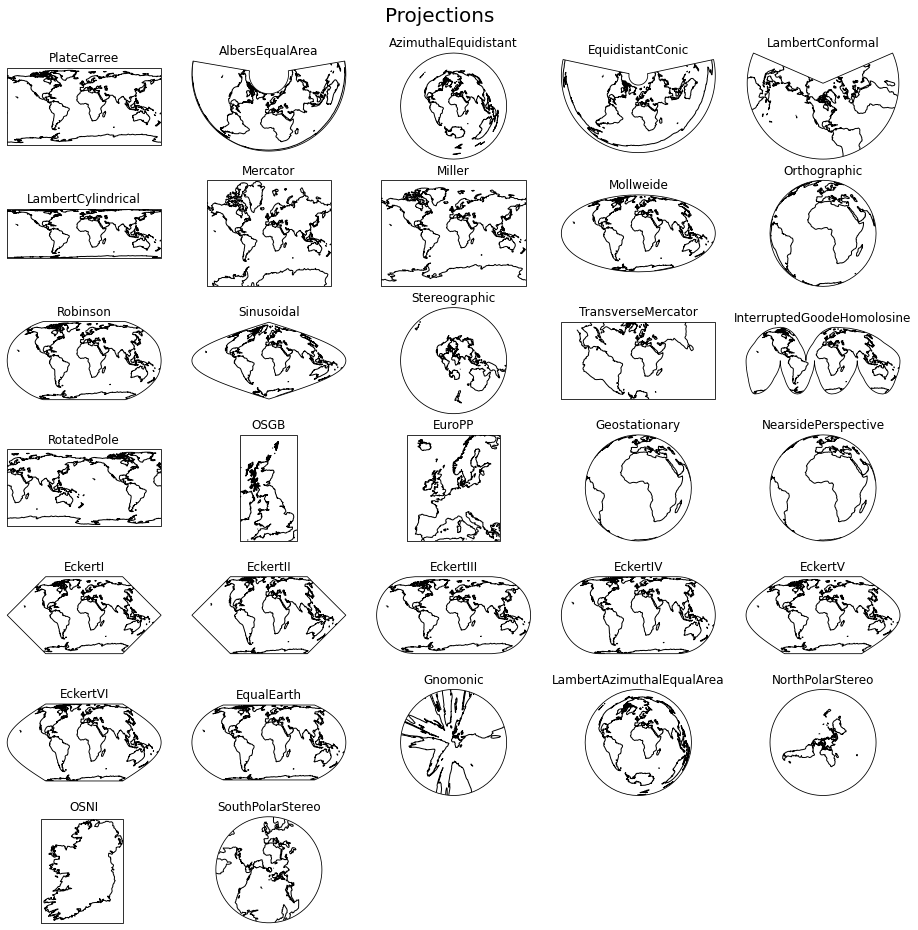

In [12]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

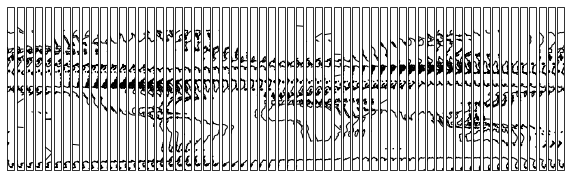

In [13]:
# UTM
nplots = 60
fig = plt.figure(figsize=(10, 3))
for i in range(0, nplots):
    ax = fig.add_subplot(1, nplots, i+1, projection=ccrs.UTM(zone=i+1))
    ax.coastlines()

# Add Latitude and Longitude Labels

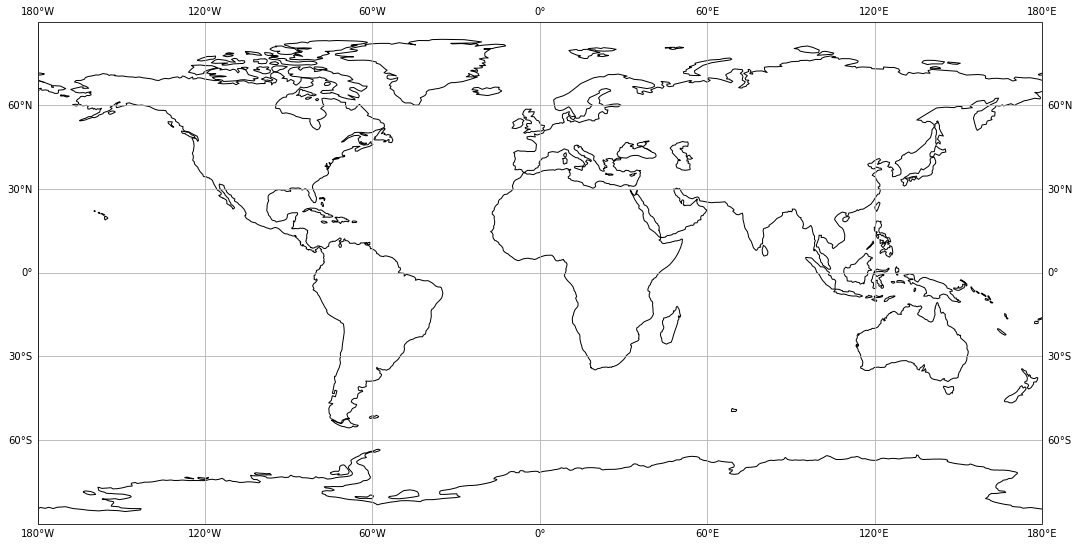

In [14]:
# latitude and longitude with east and west, etc.
plt.figure(figsize=(18, 12))
m8 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m8.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m8.coastlines()

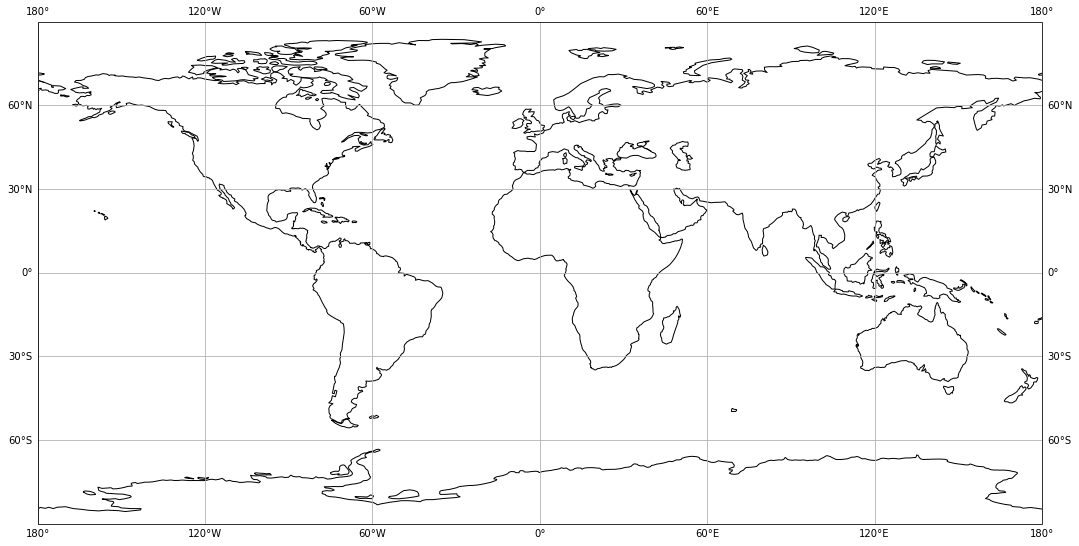

In [15]:
# latitude and longitude with positive and negative
plt.figure(figsize=(18, 12))
m9 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m9.gridlines(draw_labels=True)
m9.coastlines()

# Map Tiles

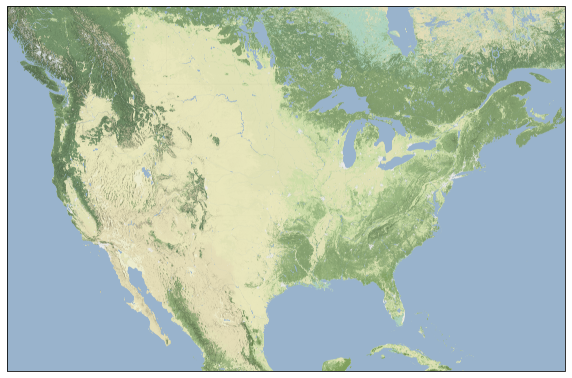

In [16]:
# run time can take several minutes
# import cartopy.io.img_tiles as cimgt
plt.figure(figsize=(10,10))
stamen_terrain = cimgt.Stamen('terrain-background')
m10 = plt.axes(projection=stamen_terrain.crs)
# (x0, x1, y0, y1)
m10.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
# add map, zoom level
m10.add_image(stamen_terrain, 8)

# Natural Earth Data
scale options include: 10m, 50m, 110m (not all maps have all options)

some data options may not work

In [17]:
# shpreader.natural_earth?

In [18]:
# cfeature.NaturalEarthFeature?

In [19]:
from IPython.display import IFrame
ne = IFrame(src='https://www.naturalearthdata.com', width=1000, height=500)
display(ne)

/home/jmedinah09/miniconda3/envs/unidata/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_roads.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


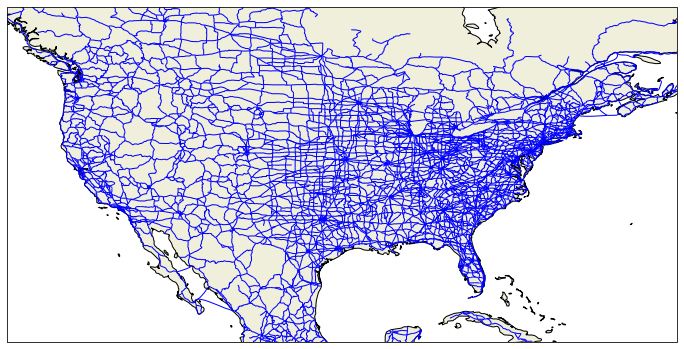

In [20]:
# roads
# import cartopy.feature as cfeature
plt.figure(figsize=(12, 12))
m11 = plt.axes(projection=ccrs.PlateCarree())

# natural earth
# remove ne_10m_ from ne_10m_roads downloaded file name for name argument assignment
roads = cfeature.NaturalEarthFeature(category='cultural',
                                     name='roads',
                                     scale='10m',
                                     facecolor='none')

# (x0, x1, y0, y1)
m11.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m11.add_feature(cfeature.LAND)
m11.add_feature(cfeature.COASTLINE)
m11.add_feature(roads, edgecolor='blue')

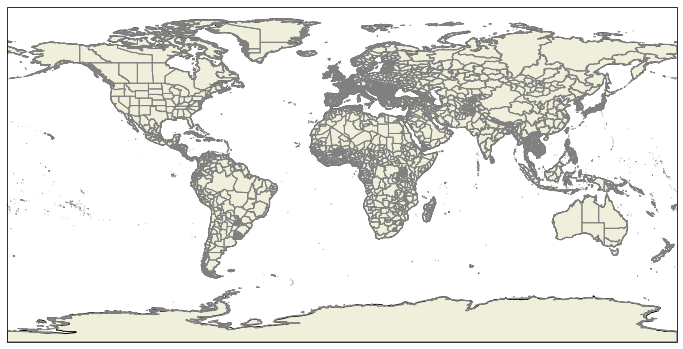

In [21]:
# states and provinces
# import cartopy.feature as cfeature
plt.figure(figsize=(12, 12))
m12 = plt.axes(projection=ccrs.PlateCarree())

# natural earth
# remove ne_10m_ from ne_10m_admin_1_states_provinces downloaded file name for name argument assignment
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces',
                                                scale='10m',
                                                facecolor='none')

m12.add_feature(cfeature.LAND)
m12.add_feature(cfeature.COASTLINE)
m12.add_feature(states_provinces, edgecolor='gray')

# Shapefile Layers

In [23]:
# US Census Bureau - https://www.census.gov/cgi-bin/geo/shapefiles/index.php (counties data)
# import cartopy.io.shapereader as shpreader
# import cartopy.feature as cfeature
# run time can take several minutes

# reader = shpreader.Reader('path/file_name.shp')
# counties = list(reader.geometries())
# COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

# plt.figure(figsize=(10, 6))
# m13 = plt.axes(projection=ccrs.PlateCarree())
# m13.set_extent([-135, -60, 20, 60])
# m13.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
# ax.coastlines()

# Chart with Map Inset

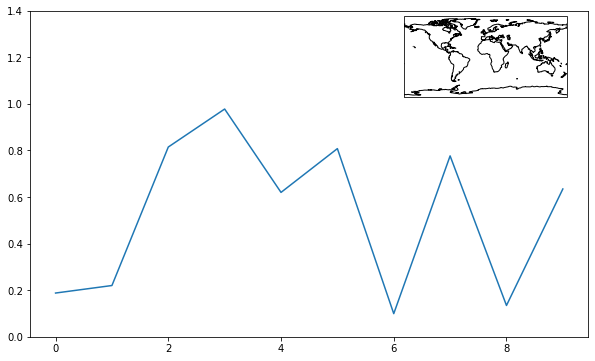

In [25]:
# import cartopy.mpl.geoaxes
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10,6))
m14 = fig.add_subplot()
m14.plot(np.random.rand(10))
m14.set_ylim(0,1.4)

inset = inset_axes(m14, width='35%', height='25%', loc='upper right', 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=ccrs.PlateCarree()))

inset.coastlines()

# Maps with Widgets (ipywidgets)

Output()

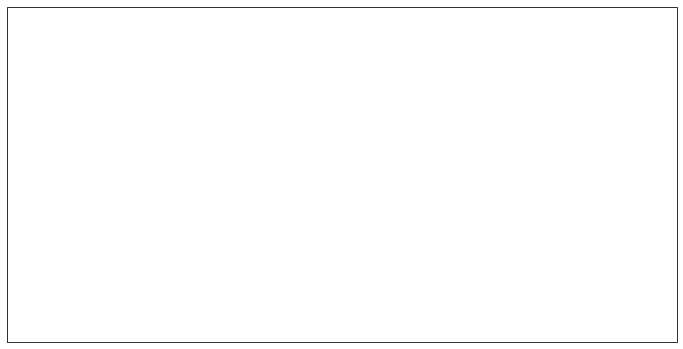

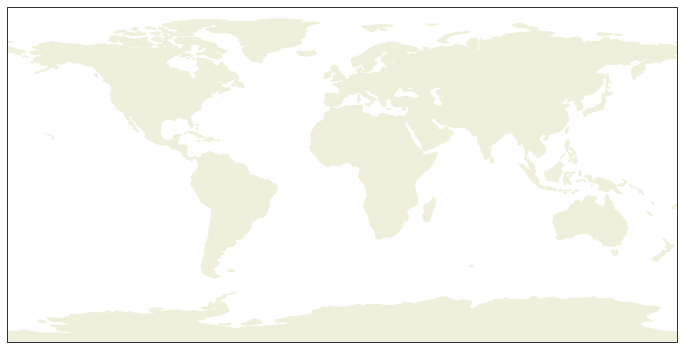

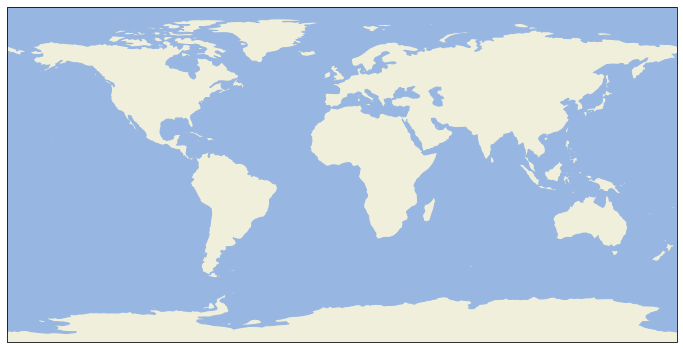

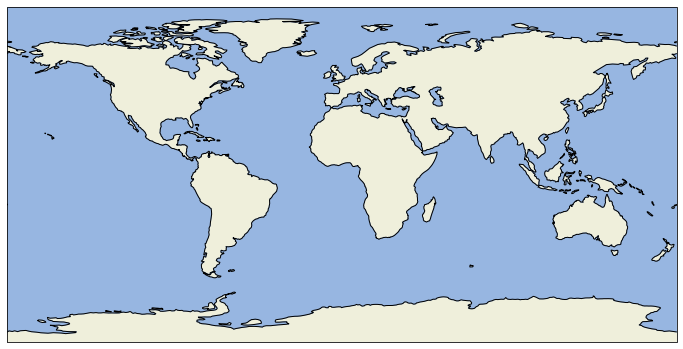

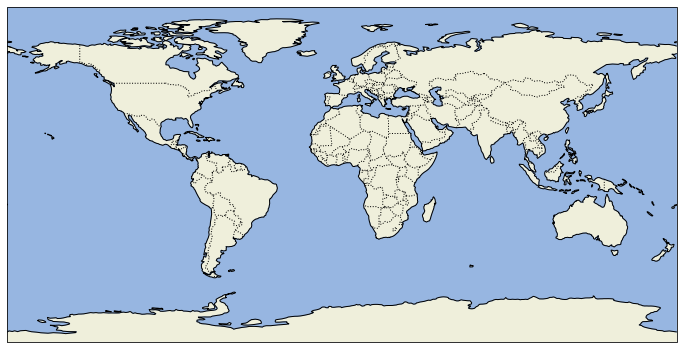

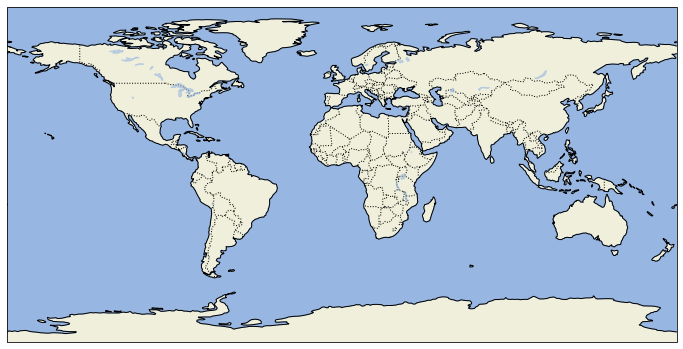

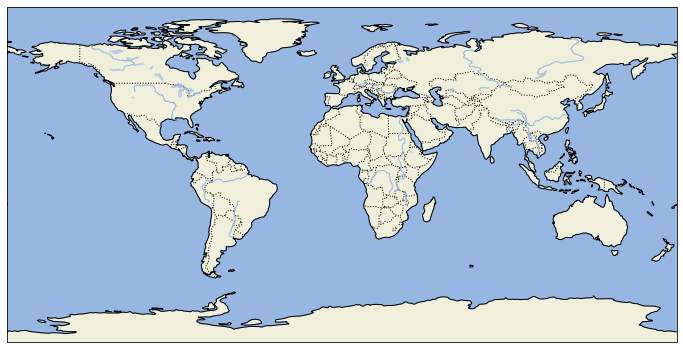

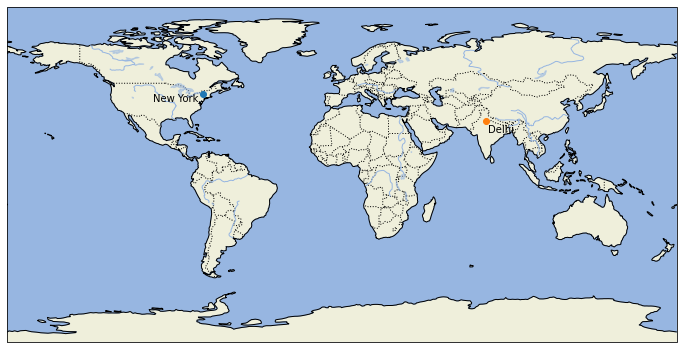

In [26]:
import ipywidgets
from ipywidgets import Layout

land = ipywidgets.Checkbox(description='land', style={'description_width': 'initial'})
ocean = ipywidgets.Checkbox(description='ocean', style={'description_width': 'initial'})
coastline = ipywidgets.Checkbox(description='coastline', style={'description_width': 'initial'})
borders = ipywidgets.Checkbox(description='borders', style={'description_width': 'initial'})
lakes = ipywidgets.Checkbox(description='lakes', style={'description_width': 'initial'})
rivers = ipywidgets.Checkbox(description='rivers', style={'description_width': 'initial'})
plot_locations = ipywidgets.Checkbox(description='plot_locations', style={'description_width': 'initial'})

box_layout = ipywidgets.Layout(display='inline-flex',                               
                               flex_flow='row',
                               align_items='stretch',
                               border='solid',
                               width='100%')

ui = ipywidgets.HBox([land, ocean, coastline, borders, lakes, rivers, plot_locations], layout=box_layout)

def create_map(land,ocean,coastline,borders,lakes,rivers,plot_locations):
    data_crs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1, projection=data_crs)
    # make the map global rather than have it zoom in to the extents of any plotted data
    ax.set_global()
    if land == True: ax.add_feature(cfeature.LAND)
    if ocean == True: ax.add_feature(cfeature.OCEAN)
    if coastline == True: ax.add_feature(cfeature.COASTLINE)
    if borders == True: ax.add_feature(cfeature.BORDERS, linestyle=':')
    if lakes == True: ax.add_feature(cfeature.LAKES, alpha=0.5)
    if rivers == True: ax.add_feature(cfeature.RIVERS)
    if plot_locations == True:
        ny_lon, ny_lat = -75, 43
        delhi_lon, delhi_lat = 77.23, 28.61
        ax.plot(ny_lon, ny_lat, 'o', transform=data_crs)
        ax.plot(delhi_lon, delhi_lat, 'o', transform=data_crs)
        ax.text(ny_lon - 2, ny_lat - 4, 'New York', horizontalalignment='right', transform=data_crs)
        ax.text(delhi_lon + 1, delhi_lat - 6, 'Delhi', horizontalalignment='left', transform=data_crs)
        
out = ipywidgets.interactive_output(create_map, {'land': land,
                                                 'ocean': ocean,
                                                 'coastline': coastline,
                                                 'borders': borders,
                                                 'lakes': lakes,
                                                 'rivers': rivers,
                                                 'plot_locations': plot_locations})

display(ui, out)